TALLER DE ESTADÍSTICA Y VISUALIZACIÓN

La intencionalidad del taller se centra en la generación de estadística descriptiva, a partir de un DataFrame de prueba. Adicionalmente, se busca hacer un acercamiento a las librerias de Seaborn, Matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
url_dataset= "https://raw.githubusercontent.com/ngarciad/UPC/refs/heads/main/seguros.csv"  

#Cargar el DataSet usando Pandas
try:
    df_seguros= pd.read_csv(url_dataset)
    print("DataSet seguros.csv cargado correctamente.")
    print("Mostrar los primeros 5 registros del DataFrame:")
    df_seguros.head()
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}\n Verificar la URL o conectividad")

DataSet seguros.csv cargado correctamente.
Mostrar los primeros 5 registros del DataFrame:


In [ ]:
#Mostrar la estructura del DataFrame
df_seguros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
print("Conteo de valores únicos en las series categóricas")
for col in df_seguros.select_dtypes(include= 'object').columns:
    print(f"\nColumna: {col}")
    print(f"Número de valores únicos {df_seguros[col].nunique()}")
    print("- Conteo de valor único")
    print(df_seguros[col].value_counts())


Conteo de valores únicos en las series categóricas

Columna: sex
Número de valores únicos 2
- Conteo de valor único
sex
male      676
female    662
Name: count, dtype: int64

Columna: smoker
Número de valores únicos 2
- Conteo de valor único
smoker
no     1064
yes     274
Name: count, dtype: int64

Columna: region
Número de valores únicos 4
- Conteo de valor único
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [22]:
df_seguros.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
df_seguros.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [24]:
print("\n .--- Media, Mediana y Moda ---")
print(f"media de la edad: {df_seguros['age'].mean():.2f}")
print(f"media de la IMC: {df_seguros['bmi'].mean():.2f}")
print(f"media de los cargos: {df_seguros['charges'].mean():.2f}")

print(f"mediana de la edad: {df_seguros['age'].median():.2f}")
print(f"mediana de la IMC: {df_seguros['bmi'].median():.2f}")
print(f"mediama de los cargos: {df_seguros['charges'].median():.2f}")

print(f"moda de la sexo: {df_seguros['sex'].mode()[0]}")
print(f"moda de la región: {df_seguros['region'].mode()[0]}")
print(f"moda de la cantidad de fumadores: {df_seguros['smoker'].mode()[0]}")



 .--- Media, Mediana y Moda ---
media de la edad: 39.21
media de la IMC: 30.66
media de los cargos: 13270.42
mediana de la edad: 39.00
mediana de la IMC: 30.40
mediama de los cargos: 9382.03
moda de la sexo: male
moda de la región: southeast
moda de la cantidad de hijos: no


In [25]:
print("\n -- mínimo, máximo, rango ")
for col in ['age', 'bmi', 'charges']:
    min_val= df_seguros[col].min()
    max_val= df_seguros[col].max()
    range_val= max_val - min_val
    print(f"\n Columna {col}")
    print(f"Mínimo: {min_val:.2f}")
    print(f"Máximo: {max_val:.2f}")
    print(f"Rango: {range_val:.2f}")
    



 -- mínimo, máximo, rango 

 Columna age
Mínimo: 18.00
Máximo: 64.00
Rango: 46.00

 Columna bmi
Mínimo: 15.96
Máximo: 53.13
Rango: 37.17

 Columna charges
Mínimo: 1121.87
Máximo: 63770.43
Rango: 62648.55


In [26]:
print("\n --- varianza y desviación estándar ---")
for col in ['age', 'bmi', 'charges']:
    varianza= df_seguros[col].var()
    desviacion= df_seguros[col].std()
    print(f"\n Columna {col}")
    print(f"Varianza: {varianza:.2f}")
    print(f"Desviación: {desviacion:.2f}")


 --- varianza y desviación estándar ---

 Columna age
Varianza: 197.40
Desviación: 14.05

 Columna bmi
Varianza: 37.19
Desviación: 6.10

 Columna charges
Varianza: 146652372.15
Desviación: 12110.01


In [4]:
asimetria= df_seguros['charges'].skew()
curtosis= df_seguros['charges'].kurtosis()
print(f"\nAsimetría de los cargos: {asimetria:.2f}")
print(f"Curtosis de los cargos: {curtosis:.2f}")


Asimetría de los cargos: 1.52
Curtosis de los cargos: 1.61


VISUALIZACIÓN

''

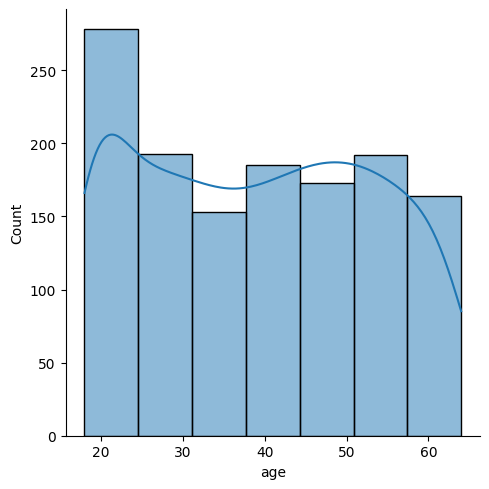

In [6]:
# Plot the histogram thanks to the displot function
sns.displot( data=df_seguros["age"], bins= 7, kde=True )
;

<Axes: >

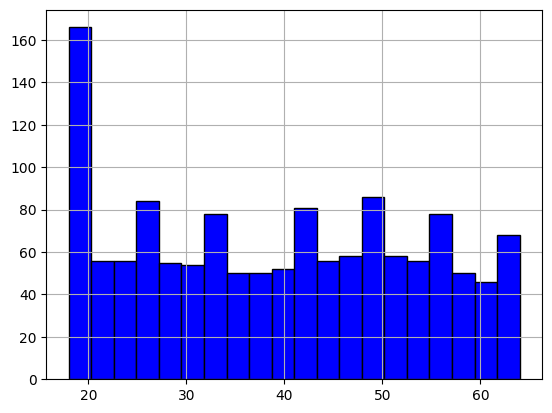

In [38]:
df_seguros['age'].hist(bins=20,
                       color='blue',
                       edgecolor='black')

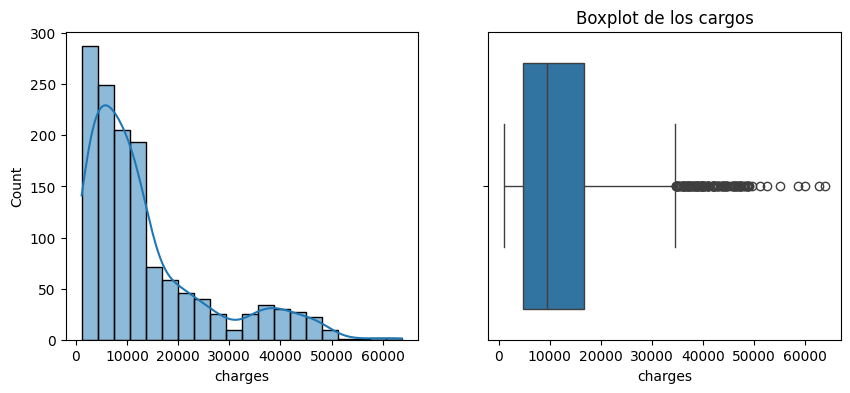

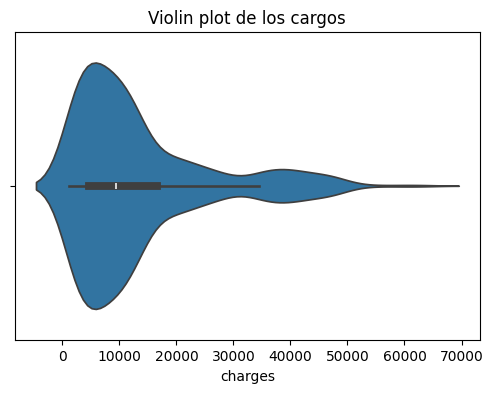

In [10]:
plt.figure(figsize=(10, 4))

#Histograma + KDE
plt.subplot(1, 2, 1)
sns.histplot(df_seguros['charges'], bins=20, kde=True)
plt.title

#boxplot("Boxplot de los cargos")
plt.subplot(1, 2, 2)
sns.boxplot(x=df_seguros['charges'])
plt.title("Boxplot de los cargos")

plt.show()

plt.figure(figsize=(6, 4))
sns.violinplot(x=df_seguros['charges'])
plt.title("Violin plot de los cargos")
plt.show()



<Axes: xlabel='age'>

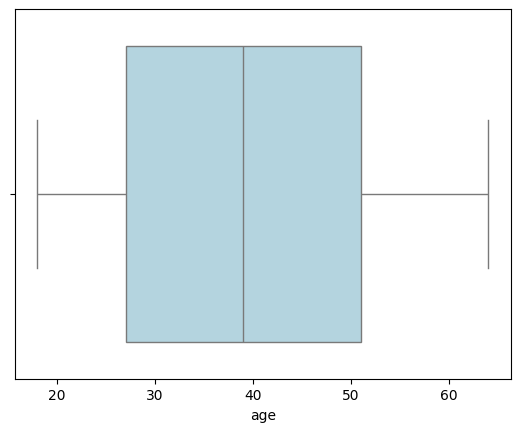

In [11]:
sns.boxplot(x=df_seguros['age'], color= 'lightblue')

<Axes: xlabel='sex', ylabel='bmi'>

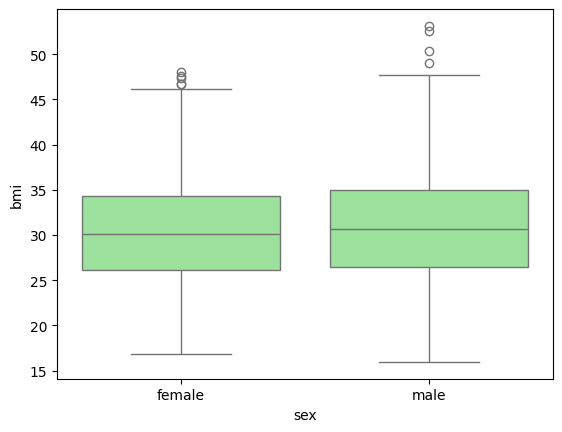

In [12]:
sns.boxplot(x= df_seguros['sex'], y= df_seguros['bmi'], color= 'lightgreen')

<Axes: xlabel='smoker', ylabel='charges'>

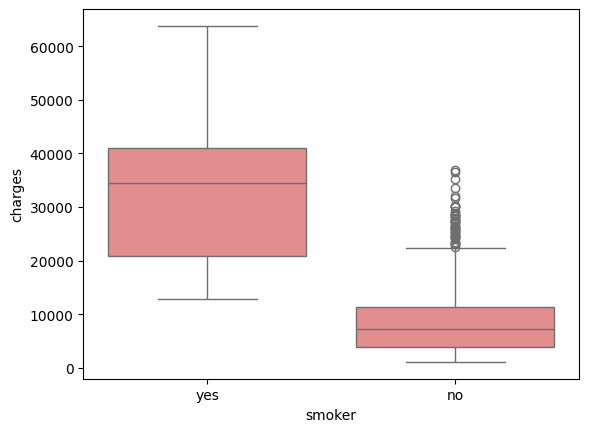

In [ ]:
sns.boxplot(x='smoker', y='charges', data= df_seguros, color='lightcoral')

<Axes: ylabel='region'>

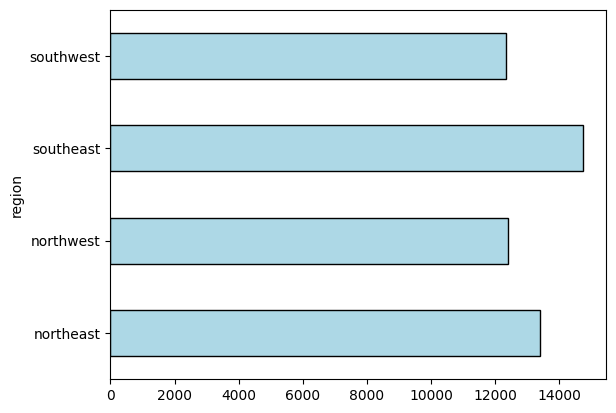

In [14]:
df_seguros.groupby('region')['charges'].mean().plot(kind= 'barh', 
                                                    color='lightblue', edgecolor='black') 

In [17]:
print("\n --- Asimetría (skew) y Curtósis(kurtosis) ---")
for col in ['age', 'bmi', 'charges']:
    asimetria= df_seguros[col].skew()
    curtosis= df_seguros[col].kurtosis()
    etm= df_seguros[col].sem()
    print(f"\n Columna {col}")
    print(f"Asimetría: {asimetria:.2f}")
    print(f"Curtósis: {curtosis:.2f}")
    print(f"Error típico de la muestra: {etm:.2f}")


 --- Asimetría (skew) y Curtósis(kurtosis) ---

 Columna age
Asimetría: 0.06
Curtósis: -1.25
Error típico de la muestra: 0.38

 Columna bmi
Asimetría: 0.28
Curtósis: -0.05
Error típico de la muestra: 0.17

 Columna charges
Asimetría: 1.52
Curtósis: 1.61
Error típico de la muestra: 331.07


In [27]:
print("\n --- Covarianza ---")
print(df_seguros[['age', 'bmi', 'children', 'charges']].cov())


 --- Covarianza ---
                   age           bmi    children       charges
age         197.401387      9.362337    0.719303  5.087480e+04
bmi           9.362337     37.187884    0.093795  1.464730e+04
children      0.719303      0.093795    1.453213  9.926742e+02
charges   50874.802298  14647.304426  992.674197  1.466524e+08


''

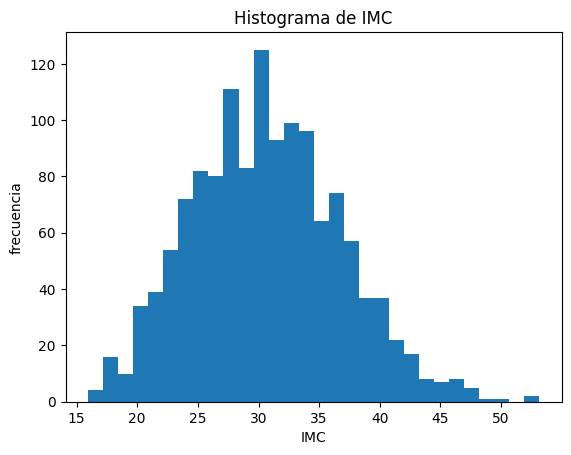

In [26]:
#Histogramas

plt.figure()
plt.hist(df_seguros['bmi'], bins=30)
plt.title("Histograma de IMC")
plt.xlabel('IMC')
plt.ylabel('frecuencia')
;

Visualización bivariada

''

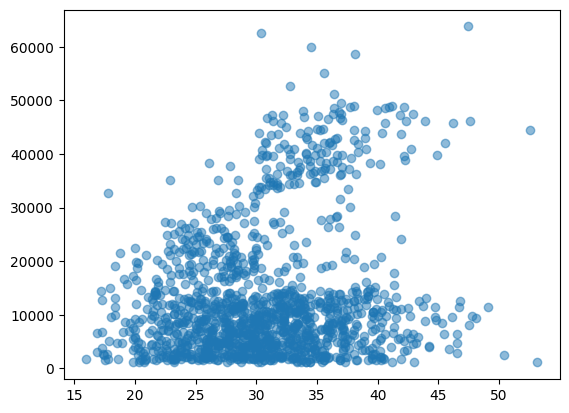

In [29]:
plt.figure()
plt.scatter(df_seguros['bmi'], df_seguros['charges'], alpha=0.5)
;

''

<Figure size 640x480 with 0 Axes>

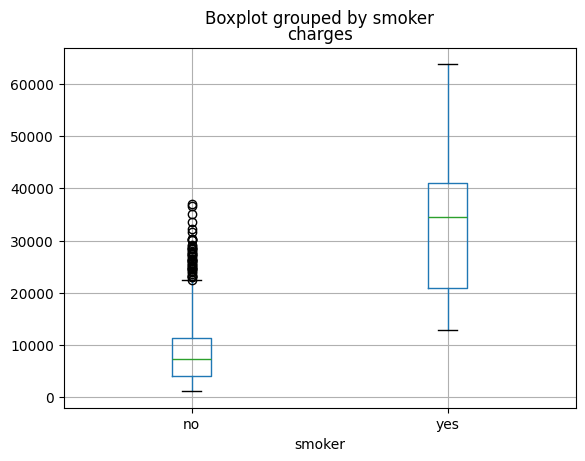

In [31]:
plt.figure()
df_seguros.boxplot(column= 'charges', by='smoker')
;

''

<Figure size 640x480 with 0 Axes>

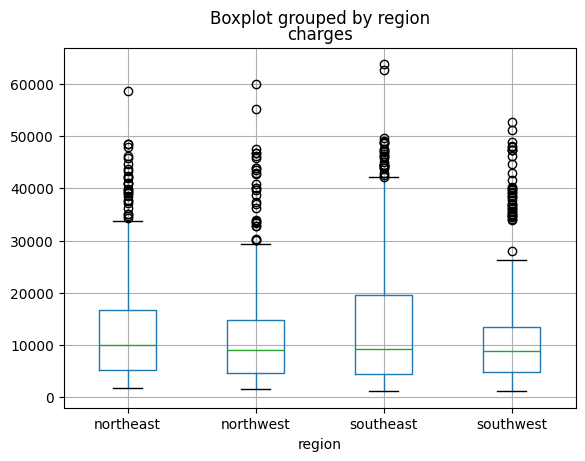

In [34]:
plt.figure()
df_seguros.boxplot(column= 'charges', by= 'region', rot=0)
;

#Visualización Multivariada

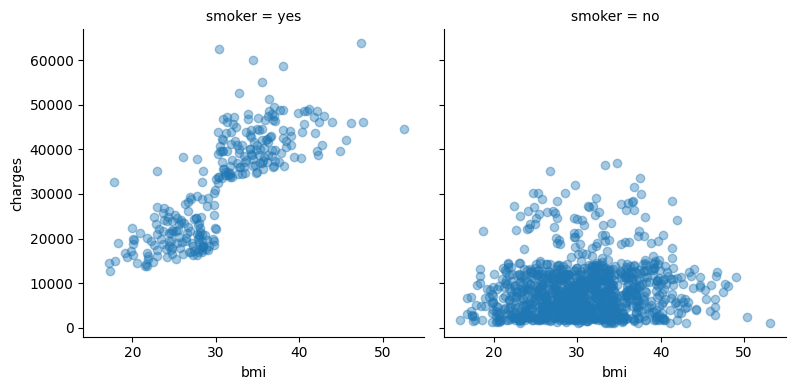

In [42]:
g= sns.FacetGrid(df_seguros, col='smoker', height = 4)
g.map(plt.scatter, "bmi", "charges", alpha=0.4)
g.add_legend()
plt.show()

In [43]:
#Filtro: fumadores con ibc > 30

f1= df_seguros.query("smoker == 'yes' and bmi > 30")
f1.head()

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760


In [44]:
#Filtro múltiple: region= 'southeast' al menos 2 hijos

f2= df_seguros[(df_seguros['region'] == 'southeast') & (df_seguros['children'] >= 2)]
f2.head()

,age,sex,bmi,children,smoker,region,charges
2,28,male,33.00,3,no,southeast,4449.4620
25,59,female,27.72,3,no,southeast,14001.1338
41,31,female,36.63,2,no,southeast,4949.7587
43,37,female,30.80,2,no,southeast,6313.7590
57,18,male,31.68,2,yes,southeast,34303.1672


In [45]:
f3= df_seguros.query("region == 'southeast' and children >= 2")
f3.head()

,age,sex,bmi,children,smoker,region,charges
2,28,male,33.00,3,no,southeast,4449.4620
25,59,female,27.72,3,no,southeast,14001.1338
41,31,female,36.63,2,no,southeast,4949.7587
43,37,female,30.80,2,no,southeast,6313.7590
57,18,male,31.68,2,yes,southeast,34303.1672


In [53]:
grp= df_seguros.groupby('smoker')['charges'].agg(['mean', 'count', 'median']).reset_index()
grp

,smoker,mean,count,median
0,no,8434.268298,1064,7345.40530
1,yes,32050.231832,274,34456.34845


In [51]:
grp1= df_seguros.groupby(['region', 'smoker'])['charges'].mean().unstack() 
grp1 

smoker,no,yes
region,,
northeast,9165.531672,29673.536473
northwest,8556.463715,30192.003182
southeast,8032.216309,34844.996824
southwest,8019.284513,32269.063494


In [56]:
df_seguros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
#Tabla pivote: tablqs resumidas con requerimientos específicos
pv= pd.pivot_table(df_seguros, 
                   values= 'charges',
                   index= 'region',
                   columns='smoker',
                   aggfunc= "mean", 
                   fill_value= 0)
pv

smoker,no,yes
region,,
northeast,9165.531672,29673.536473
northwest,8556.463715,30192.003182
southeast,8032.216309,34844.996824
southwest,8019.284513,32269.063494


<Figure size 640x480 with 0 Axes>

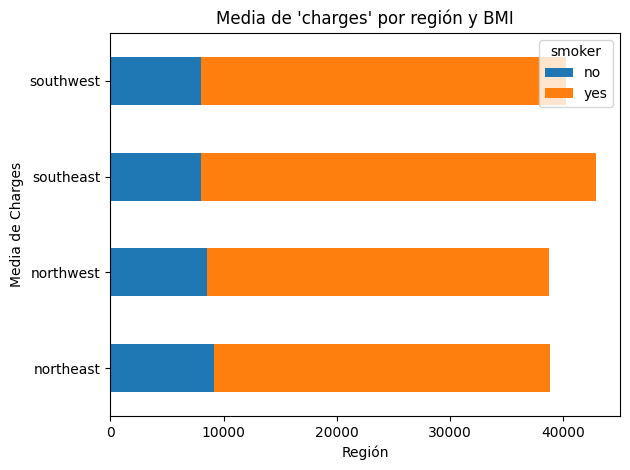

''

In [35]:
#Gráfico a partir de la tabla pivote

plt.figure()
pv.plot(kind="barh", stacked= True)
plt.title("Media de 'charges' por región y BMI")
plt.xlabel("Región")
plt.ylabel("Media de Charges")
plt.tight_layout()
plt.show()
;


In [12]:
df_seguros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


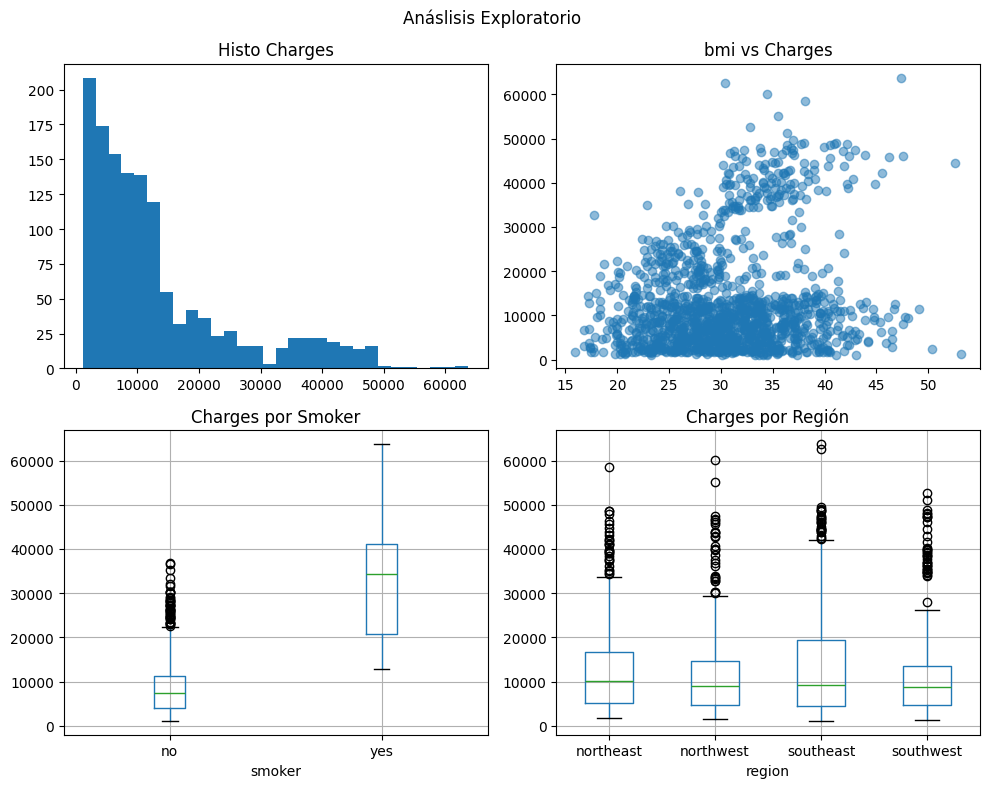

''

In [32]:
#Grid 2x2 con diferentes vistas de 'charges'
fig, axes= plt.subplots(2, 2, figsize=(10, 8))

# Gráfica en el eje [0, 0] del lienzo
axes[0,0].hist(df_seguros['charges'], bins= 30)
axes[0,0].set_title("Histo Charges")

# Gráfica en el eje [0, 1] del lienzo
axes[0,1].scatter(df_seguros["bmi"], df_seguros['charges'], alpha= 0.5)
axes[0,1].set_title("bmi vs Charges")

# Gráfica en el eje [1, 0] del lienzo
df_seguros.boxplot(column= 'charges', by= "smoker", ax= axes [1, 0])
axes[1,0].set_title("Charges por Smoker")
axes[1,0].figure.suptitle(" ")

# Gráfica en el eje [1, 1] del lienzo
df_seguros.boxplot(column= 'charges', by= "region", ax= axes [1, 1])
axes[1,1].set_title("Charges por Región")
axes[1,1].figure.suptitle("Anáslisis Exploratorio ")

plt.tight_layout()
plt.savefig("img/Analisis_Exploratorio1.png", dpi= 300)
plt.savefig("img/Analisis_Exploratorio2.pdf")
plt.savefig("img/Analisis_Exploratorio3.jpg", dpi= 300)

plt.show()

;

##Guardar figuras en el repositorio (para informes)

In [ ]:
import os

os.makedirs('img', exist_ok=True)

plt.figure()
plt.hist(df_seguros['charges'], bins=28)
plt.title('Distribución de Charges')
#Guardar archivo en Google Colab
plt.savefig("G:/Mi unidad/UPC/Documentos Consultoria/Allianz-2025/histo_charges.png") 
#vdpi= 150, bbox_inches= "tight") #Archivo local
plt.close()


Ejercicio:
Comparar el impacto del tabaquismo por región, graficar los resultados.
  